In [2]:
import pandas as pd
import numpy as np

from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
df = pd.read_csv('Spotify Most Streamed Songs.csv')
df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [3]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'cover_url'],
      dtype='object')

In [4]:
df['cover_url'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 953 entries, 0 to 952
Series name: cover_url
Non-Null Count  Dtype 
--------------  ----- 
953 non-null    object
dtypes: object(1)
memory usage: 7.6+ KB


# Описание датасета

Этот датасет содержит информацию о некоторых из самых популярных песен на Spotify, дополненную информацией из других популярных музыкальных стриминговых платформ, таких как Apple Music, Deezer и Shazam. 
Источник: 
Kaggle (https://www.kaggle.com/datasets/abdulszz/spotify-most-streamed-songs/data)

Чтобы увидеть названия всех столбцов, мы применили метод .columns() <br>
<b>1. track_name</b>
<br>
В столбце содержатся названия песен. Это категориальные номинальные данные. Тип данных в Python - string(str), строки. <br>
<b>2. artist(s)_name_</b><br>
В этом столбце содержатся имена артист_ок, которые исполняли песни из 1 столбца. Это категориальные номинальные данные. Тип данных в Python - str.<br>
<b>3. artist_count</b><br>
В этом столбце указано количество артист_ок, которые исполняли песни из 1 столбца. Вывели столбец подсчетом артист_ок из 2 столбца. Это количественные дискретные данные.Тип данных в Python - integer (int), целое число.<br>
<b>4. released_year</b><br>
Этот столбец сообщает год выпуска песни. Это количественные дискретные данные. Тип данных в Python - integer (int), целое число.<br>
<b>5. released_month</b><br>
Этот столбец сообщает месяц выпуска песни. Это количественные дискретные данные. Тип данных в Python - integer (int), целое число.<br>
<b>6. released_day</b><br>
Этот столбец сообщает день выпуска песни. Это количественные дискретные данные. Тип данных в Python - int.<br>
<b>7. in_spotify_playlist</b><br>
Этот столбец сообщает, в какое количество плейлистов пользователи Spotify добавили песню. Это количественные дискретные данные. Тип данных в Python - int.<br>
<b>8. in_spotify_charts</b><br>
В этом столбце указано, какое место занимала песня в чартах Spotify. Это категориальные порядковые (ранговые) данные. Тип данных в Python - int.<br>
<b>9. streams</b><br>
В этом столбце указано, сколько раз пользователи проигрывали песню. Это количественные дискретные данные. Тип данных в Python - int.<br>
<b>10. in_apple_playlists</b><br>
Этот столбец сообщает, в какое количество плейлистов пользователи Apple Music добавили песню. Это количественные дискретные данные. Тип данных в Python - int.<br>
<b>11. in_apple_charts</b><br>
В этом столбце указано, какое место занимала песня в чартах Apple Music. Это категориальные порядковые (ранговые) данные. Тип данных в Python - int.<br>
<b>12. in_deezer_playlists</b><br>
Этот столбец сообщает, в какое количество плейлистов пользователи Deezer добавили песню. Это количественные дискретные данные. Тип данных в Python - int.<br>
<b>13. in_deezer_charts</b><br>
В этом столбце указано, какое место занимала песня в чартах Deezer. Это категориальные порядковые (ранговые) данные. Тип данных в Python - int.<br>Чтобы увидеть названия всех столбцов, мы применили метод .columns() <br>
<b>1. track_name</b>
<br>
В столбце содержатся названия песен. Это категориальные номинальные данные. Формат данных в Python - string(str), строки. <br>
<b>2. artist(s)_name_</b><br>
В этом столбце содержатся имена артист_ок, которые исполняли песни из 1 столбца. Это категориальные номинальные данные. Формат данных в Python - str.<br>
<b>3. artist_count</b><br>
В этом столбце указано количество артист_ок, которые исполняли песни из 1 столбца. Вывели столбец подсчетом артист_ок из 2 столбца. Это количественные дискретные данные. Формат данных в Python - integer (int), целое число.<br>
<b>4. released_year</b><br>
Этот столбец сообщает год выпуска песни. Это количественные дискретные данные. Формат данных в Python - integer (int), целое число.<br>
<b>5. released_month</b><br>
Этот столбец сообщает месяц выпуска песни. Это количественные дискретные данные. Формат данных в Python - integer (int), целое число.<br>
<b>6. released_day</b><br>
Этот столбец сообщает день выпуска песни. Это количественные дискретные данные. Формат данных в Python - int.<br>
<b>7. in_spotify_playlist</b><br>
Этот столбец сообщает, в какое количество плейлистов пользователи Spotify добавили песню. Это количественные дискретные данные. Формат данных в Python - int.<br>
<b>8. in_spotify_charts</b><br>
В этом столбце указано, какое место занимала песня в чартах Spotify. Это категориальные порядковые (ранговые) данные. Формат данных в Python - int.<br>
<b>9. streams</b><br>
В этом столбце указано, сколько раз пользователи проигрывали песню. Это количественные дискретные данные. Неотформатированные данные. После перевода данных формат в Python - int.<br>
<b>10. in_apple_playlists</b><br>
Этот столбец сообщает, в какое количество плейлистов пользователи Apple Music добавили песню. Это количественные дискретные данные. Формат данных в Python - int.<br>
<b>11. in_apple_charts</b><br>
В этом столбце указано, какое место занимала песня в чартах Apple Music. Это категориальные порядковые (ранговые) данные. Формат данных в Python - int.<br>
<b>12. in_deezer_playlists</b><br>
Этот столбец сообщает, в какое количество плейлистов пользователи Deezer добавили песню. Это количественные дискретные данные. Формат данных в Python - int.<br>
<b>13. in_deezer_charts</b><br>
В этом столбце указано, какое место занимала песня в чартах Deezer. Это категориальные порядковые (ранговые) данные. Формат данных в Python - int.<br>
<b>14. in_shazam_charts</b><br>
В этом столбце указано, какое место занимала песня в чартах Shazam. Это категориальные порядковые (ранговые) данные. Формат данных в Python - int.<br>
<b>15. bpm</b><br>
Такты в минуту, показывающие темп песни. Это количественные дискретные данные. Формат данных в Python - int.<br>
<b>16. key</b><br>
Тональность песни. Это категориальные номинальные данные. Формат данных в Python - str.<br>
<b>17. mode</b><br>
Какой лад у песни: мажорный или минорный. Это категориальные бинарные данные. Формат данных в Python - str.<br>
<b>18. danceability_%</b><br>
На сколько % песня пригодна для танцев. Это количественные дискретные данные. Формат данных в Python - int.<br>
<b>19. valence_%</b><br>
На сколько % позитивен текст трека. Это количественные дискретные данные. Формат данных в Python - int.<br>
<b>20. energy_%</b><br>
На сколько % энергична песня. Это количественные дискретные данные. Формат данных в Python - int.<br>
<b>21. acousticness_%</b><br>
Доля акустического звука в треке в процентном соотношении. Это количественные дискретные данные. Формат данных в Python - int.<br>
<b>22. instrumentalness_%</b><br>
Доля инструментального контента в треке в процентном соотношении. Это количественные дискретные данные. Формат данных в Python - int.<br>
<b>23. liveness_%</b><br>
Сколько % живого исполнения в песне. Это количественные дискретные данные. Формат данных в Python - int.<br>
<b>24. speechiness_%</b><br>
Доля произносимых слов в песне в процентном соотношении. Это количественные дискретные данные. Формат данных в Python - int.<br>
<b>25. cover_url</b><br>
Ссылка на обложку трека. Это категориальные номинальные данные, формат данных в Python - str.<br>

In [5]:
print(df.dtypes) #выводим типы данных

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
cover_url               object
dtype: object


Переведем данные столбца "streams" из текстовых в числовые

In [6]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Предобработка и фильтрация данных

In [7]:
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
#перевели данные из столбца in_shazam_charts из текстовых в числовые
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
#перевели данные из столбца streams из текстовых в числовые

In [8]:
df.shape

(953, 25)

Общее число песен - 953, из них:

In [9]:
df[df['artist(s)_name'] == 'Taylor Swift'].shape

(34, 25)

34 песни были написаны только Тейлор Свифт. Это примерно 4% от общего числа песен.

In [10]:
df[(df['streams'] > 1000000000)&(df['mode'] == 'Major')].shape

(96, 25)

96 песен имеют больше 1.000.000.000 прослушиваний на Spotify и исполнены в мажорном ладе, что составляет 10% от всех песен.

In [11]:
df[(df['acousticness_%'] >= 80)&(df['danceability_%'] > 50)&(df['speechiness_%'] <=10)].shape

(23, 25)

Только 23 песни из всех имеют процент акустического звука в треке больший или равный 80, процент пригодности трека для танцев больший 50 и долю произносимых слов в предложении (в процентном соотношении) меньшую или равную 10. Это примерно 2% от всех треков.

In [12]:
df[(df['in_spotify_charts'] <= 5)&(df['in_apple_charts'] <= 5)&(df['in_deezer_charts'] <= 5)&(df['in_shazam_charts'] <= 5)&(df['released_year']==2023)].shape

(8, 25)

Количество песен, которые бы попадали одновременно в топ-5 прослушиваемых песен на самых популярных стриминговых сервисах (Spotify, Apple, Deezer и Shazam), выпущенных в 2023 году, всего 8. Это примерно 1% от всех песен.

In [13]:
df[df['artist(s)_name'] == 'Bad Bunny'].shape[0]


19

19 песен было выпущено исполнителем Bad Bunny, это около 2% от общего числа песен.

In [14]:
df[(df['streams'] > 1000000000)&(df['mode'] == 'Minor')].shape

(56, 25)

56 песен имеют больше 1.000.000.000 прослушиваний на Spotify и исполнены в минорном ладе, что составляет 6% от всех песен.

# Сортировка 

In [15]:
df[df['artist(s)_name'] == 'Taylor Swift'][['track_name','streams']].sort_values(by = 'streams', ascending = False).iloc[0]


track_name     Blank Space
streams       1355959075.0
Name: 37, dtype: object

Число прослушиваний наиболее популярного трека Тейлор Свифт "Blank Space" составило 1355959075. Что примерно в 2.5 раза больше среднего числа прослушиваний на платформе.

In [16]:
df[['artist(s)_name', 'track_name', 'in_spotify_playlists']].sort_values(by = 'in_spotify_playlists', ascending = False).iloc[0]


artist(s)_name          Pharrell Williams, Nile Rodgers, Daft Punk
track_name                                  Get Lucky - Radio Edit
in_spotify_playlists                                         52898
Name: 757, dtype: object

Треком, пополнившим наибольшее число плейлистов Spotify, стала совместная работа исполнителей Pharrell Williams, Nile Rodgers, Daft Punk "Get Lucky - Radio Edit", которая вошла в 52898 плейлистов на платформе, это в 260 раз больше числа плейлистов, которые эта песня пополнила на платформе Apple music

In [17]:
df[['track_name', 'energy_%']].sort_values(by = 'energy_%', ascending = True).iloc[0]

track_name    What Was I Made For? [From The Motion Picture ...
energy_%                                                      9
Name: 17, dtype: object

Уровень энергичности наименее энергичной песни (песня 'What Was I Made For?') составил 9 процентов, что на 92 процентных пункта ниже уровня энергичности наиболее энергичной песни (97 процентов)

# Группировка

In [18]:
df.groupby('released_month')['track_name'].count().mean()

79.41666666666667

Среднее число треков, которое выходило в каждый из 12 месяцев, составило около 79.

In [19]:
 df.groupby('artist_count')['track_name'].count().reset_index().sort_values(by = 'track_name', ascending = False)[['artist_count','track_name']].iloc[0]

artist_count      1
track_name      587
Name: 0, dtype: int64

Сольных треков вышло больше (579), чем совместных композиций.

In [20]:
df.groupby('artist(s)_name')['track_name'].count().quantile(0.9)

2.0

90 процентов артистов выпустили менее 2 песен.

In [21]:
df.groupby('released_year')['track_name'].count().reset_index().rename(columns = {'track_name':'number_of_tracks'}).sort_values(by = 'number_of_tracks', ascending = False)[['released_year','number_of_tracks']].iloc[0]

released_year       2022
number_of_tracks     402
Name: 48, dtype: int64

Больше всего треков было выпущено в 2022 году (402).

In [22]:
taylor_swift = df[df['artist(s)_name'] == 'Taylor Swift']
bad_bunny = df[df['artist(s)_name'] == 'Bad Bunny']
gt = taylor_swift.groupby('released_year')['track_name'].count().reset_index().rename(columns = {'track_name':'number_of_tracks'}).sort_values(by = 'number_of_tracks', ascending = False)[['released_year','number_of_tracks']].iloc[0]
gb = bad_bunny.groupby('released_year')['track_name'].count().reset_index().rename(columns = {'track_name':'number_of_tracks'}).sort_values(by = 'number_of_tracks', ascending = False)[['released_year','number_of_tracks']].iloc[0]
print("Данные для песен Taylor Swift:\n", gt, "\nДанные для песен Bad Bunny:\n", gb, "\nСравнение:\n", gt-gb)




Данные для песен Taylor Swift:
 released_year       2022
number_of_tracks      16
Name: 7, dtype: int64 
Данные для песен Bad Bunny:
 released_year       2022
number_of_tracks      15
Name: 2, dtype: int64 
Сравнение:
 released_year       0
number_of_tracks    1
dtype: int64


Из данных для Taylor Swift и из данных для Bad Bunny мы выяснили, что и для Taylor Swift, и для Ban Bunny наиболее продуктивным в плане количества выпущенных песен оказался 2022 год. Исполнителем Taylor Swift было выпущено на 1 песню больше (16), чем исполнителем Bad Bunny (15).


In [23]:
minor = df[(df['streams'] > 1000000000)&(df['mode'] == 'Minor')].groupby('artist_count')['track_name'].count().reset_index().sort_values(by = 'track_name', ascending = False).iloc[0]
major = df[(df['streams'] > 1000000000)&(df['mode'] == 'Major')].groupby('artist_count')['track_name'].count().reset_index().sort_values(by = 'track_name', ascending = False).iloc[0]
print("Данные для минорного лада и более 1000000000 прослушиваний:\n", minor, "\nДанные для мажорного лада и более 1000000000 прослушиваний:\n", major, "\nСравнение :\n", abs(minor - major))

Данные для минорного лада и более 1000000000 прослушиваний:
 artist_count     1
track_name      41
Name: 0, dtype: int64 
Данные для мажорного лада и более 1000000000 прослушиваний:
 artist_count     1
track_name      69
Name: 0, dtype: int64 
Сравнение :
 artist_count     0
track_name      28
Name: 0, dtype: int64


Из данных о песнях, написанных в мажорном ладе и имеющих более 1000000000 прослушиваний, мы выяснили что сольных (41) песен оказалось больше, чем совместных. Из данных о песнях, написанных в мажорном ладе и имеющих более 1000000000 прослушиваний, мы выяснили, что сольных (69) песен оказалось больше чем совместных. Таким образом, песен в мажорном ладе на 28 больше, чем в минорном.

# Создание новой переменной

In [24]:
def oc(x):
    if x >= 1000000000:
        return('Хит')
    else:
        return('Не хит')
df['Hype'] = df['streams'].apply(oc)
number_of_hits = df[df['Hype'] == 'Хит'].shape[0]
number_of_nohits = df[df['Hype'] == 'Не хит'].shape[0]
print('Число хитов:', number_of_hits, '\nЧисло не хитов:', number_of_nohits)

Число хитов: 152 
Число не хитов: 801


В соответствии с имеющимися данными о количестве прослушиваний мы разделили все треки на 2 категории: хиты - те, у которых количество прослушиваний превышает 1000000000, и не хиты - все остальные песни. Выяснилось, что число хитов (152) почти в 5 раз меньше числа не хитов. 

# Выбросы 

Для начала сделаем визуализацию выбросов для столбцов "bpm" и "energy_%". Будем использовать boxplot и hist, чтобы посмотреть и распределение переменных, и выбросы.

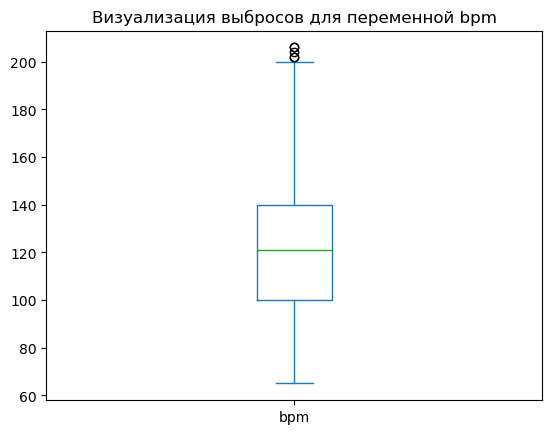

In [25]:
df['bpm'].plot(kind='box')
plt.title('Визуализация выбросов для переменной bpm')
plt.show()

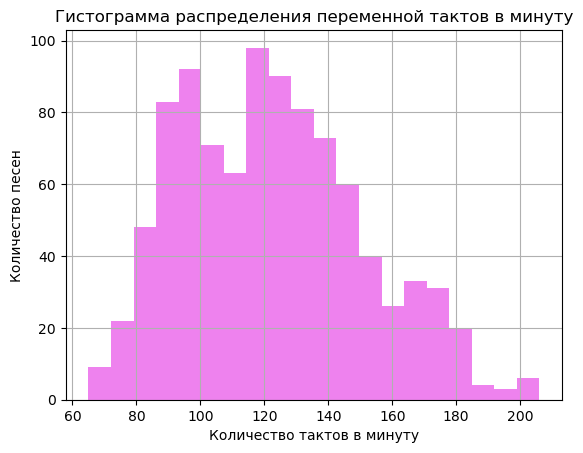

In [26]:
df['bpm'].hist(bins=20, color="violet")
plt.title('Гистограмма распределения переменной тактов в минуту')
plt.xlabel('Количество тактов в минуту')
plt.ylabel('Количество песен')

# Отображение гистограммы
plt.show()

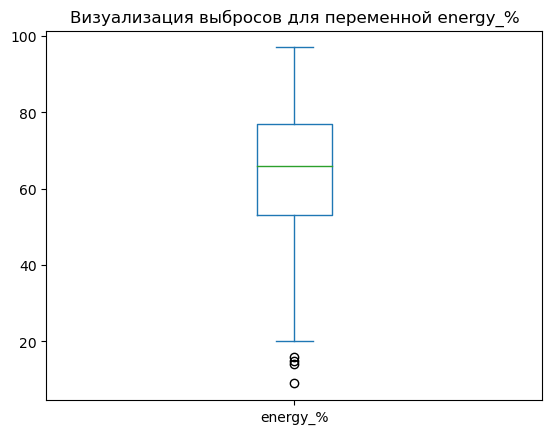

In [27]:
df['energy_%'].plot(kind='box')
plt.title('Визуализация выбросов для переменной energy_%')
plt.show()

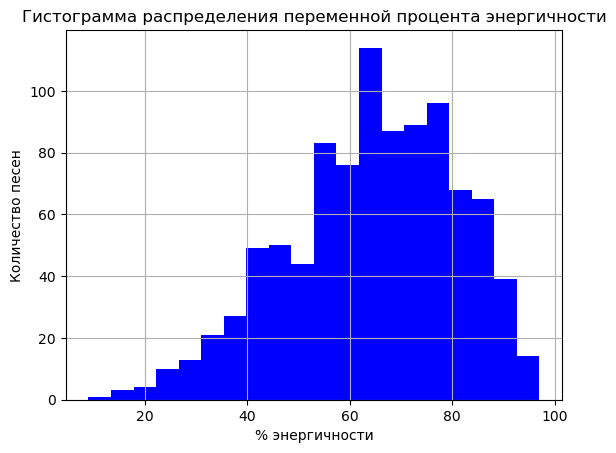

In [28]:
df['energy_%'].hist(bins=20, color="blue")
plt.title('Гистограмма распределения переменной процента энергичности')
plt.xlabel('% энергичности')
plt.ylabel('Количество песен')

# Отображение гистограммы
plt.show()

Теперь идентифицируем выбросы с использованиям метрик IQR для одной переменной и Std для другой.

#### IQR

In [29]:
q1_bpm = df['bpm'].quantile(0.25) #находим первый квартиль
q3_bpm = df['bpm'].quantile(0.75) #находим третий квартиль
iqr_bpm = q3_bpm-q1_bpm #находим межквартильное расстояние

print(f"q1 = {q1_bpm}, q3 = {q3_bpm}, iqr = {iqr_bpm}")

q1 = 100.0, q3 = 140.0, iqr = 40.0


In [30]:
lb_bpm = q1_bpm-1.5*iqr_bpm #находим нижнюю границу
ub_bpm = q3_bpm+1.5*iqr_bpm # находим верхнюю границу

print(f'lb_bpm = {lb_bpm}, up_bpm = {ub_bpm}')

lb_bpm = 40.0, up_bpm = 200.0


Посчитаем количество выбросов по IQR.

In [31]:
outliers1 = df[(df['bpm'] < lb_bpm)|(df['bpm'] > ub_bpm)]
print(outliers1.shape[0])
print(outliers1['bpm'])

5
28     204
100    206
244    202
447    202
506    206
Name: bpm, dtype: int64


Получается, что в столбце bpm всего 5 выбросов.

#### Std

In [32]:
mean_std = df['energy_%'].mean() #находим среднее значение по  столбцу
std_std = df['energy_%'].std() # находим стандартное отклонение по столбцу
print(mean_std, std_std)

64.2791185729276 16.550525977945217


Возьмем 2 стандартных отклонения от среднего и посчитаем количество выбросов.

In [33]:
lb_std = mean_std-2*std_std #нижняя граница
ub_std = mean_std+2*std_std #верхняя граница

print(lb_std, ub_std)

31.178066617037167 97.38017052881804


In [34]:
outliers2 = df[(df['energy_%'] < lb_std)|(df['energy_%'] > ub_std)]
print(outliers2.shape[0])
print(outliers2['energy_%'])

35
17      9
128    30
169    27
208    30
326    14
327    31
350    28
366    25
387    30
399    25
416    28
445    23
448    24
456    26
460    15
464    20
469    25
531    24
544    29
575    30
596    29
623    26
652    31
697    20
704    20
750    27
801    24
829    29
858    20
909    31
911    27
933    28
938    31
940    16
949    24
Name: energy_%, dtype: int64


Из метрики стандарного отклонения видно, что по столбцу "energy_%" всего 35 выбросов. 

# Корреляционная матрица

Проанализируем корелляцию между переменными в датасете. Так как у нас много числовых данных, для 5 из них создадим отдельный датасет.

In [35]:
subdf = df[['in_spotify_playlists', 'streams', 'danceability_%', 'energy_%', 'acousticness_%']]

In [36]:
subdf.corr(numeric_only=True)

,in_spotify_playlists,streams,danceability_%,energy_%,acousticness_%
in_spotify_playlists,1.000000,0.789822,-0.106534,0.033808,-0.064421
streams,0.789822,1.000000,-0.105457,-0.026051,-0.004485
danceability_%,-0.106534,-0.105457,1.000000,0.198095,-0.236165
energy_%,0.033808,-0.026051,0.198095,1.000000,-0.577344
acousticness_%,-0.064421,-0.004485,-0.236165,-0.577344,1.000000


# Интерпретация значений корреляции в матрице

- **in_spotify_playlists и streams (0.789822)** - Сильная положительная корреляция. Чем больше треков в плейлистах Spotify, тем больше у них стримов, и наоборот.

- **in_spotify_playlists и danceability_% (-0.106534)** - Слабая отрицательная корреляция. У треков в плейлистах Spotify танцевальность немного ниже.

- **in_spotify_playlists и energy_% (0.033808)** - Очень слабая положительная корреляция. Никакой значимой связи между нахождением трека в плейлисте Spotify и его "энергичностью" не наблюдается.

- **in_spotify_playlists и acousticness_% (-0.064421)** - Очень слабая отрицательная корреляция. У треков в плейлистах Spotify чуть меньше акустичность.

- **streams и danceability_% (-0.105457)** - Слабая отрицательная корреляция. Треки с более низкой танцевальностью могут иметь немного больше стримов.

- **streams и energy_% (-0.026051)** - Почти нулевая связь. Энергичность трека практически не влияет на количество его стримов.

- **streams и acousticness_% (-0.004485)** - Почти нулевая связь. Акустичность трека не связана с его популярностью (количеством стримов).

- **danceability_% и energy_% (0.198095)** - Слабая положительная корреляция. Треки с большей танцевальностью часто обладают чуть большей энергичностью.

- **danceability_% и acousticness_% (-0.236165)** - Слабая отрицательная корреляция. Танцевальные треки обычно чуть менее акустичны.

- **energy_% и acousticness_% (-0.577344)** - Умеренная отрицательная корреляция. Энергичные треки обычно менее акустичны, поскольку энергичность отражает интенсивность, громкость и яркость звука, а акустичность — более мягкие и успокаивающие характеристики.
нная отрицательная корреляция. Энергичные треки обычно меньше акустичны, поскольку энергичность относится к интенсивной громкости и яркости звука, что противоположно характеристикам актеристикам акустичных треков.е связи либо слабы, либо отсутствуют.

# Графики рассеяния по числовым признакам

Построим графики рассеяния по имеющимся интерпретируемым парам числовых признаков.

Text(0.5, 1.0, 'График рассеяния по признакам danceability_% и in_spotify_playlists')

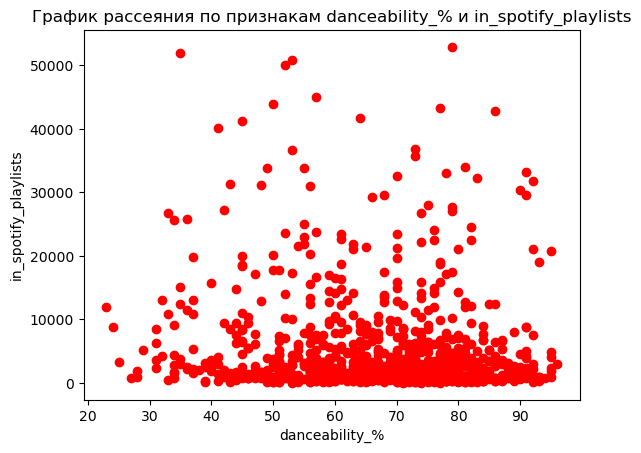

In [37]:
plt.scatter(x = df['danceability_%'], y = df['in_spotify_playlists'], color = 'red')
plt.ylabel('in_spotify_playlists')
plt.xlabel('danceability_%')
plt.title('График рассеяния по признакам danceability_% и in_spotify_playlists')

Text(0.5, 1.0, 'График рассеяния по признакам in_spotify_playlists и streams')

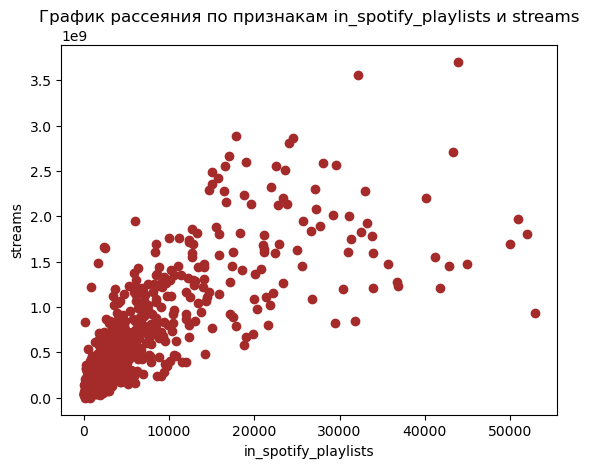

In [38]:
plt.scatter(x = df['in_spotify_playlists'], y = df['streams'], color = 'brown')
plt.xlabel('in_spotify_playlists')
plt.ylabel('streams')
plt.title('График рассеяния по признакам in_spotify_playlists и streams')

Text(0.5, 1.0, 'График рассеяния по признакам in_spotify_playlists и energy_%')

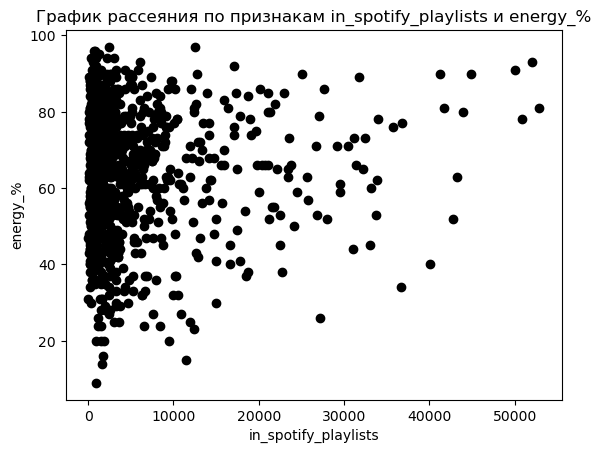

In [39]:
plt.scatter(x = df['in_spotify_playlists'], y = df['energy_%'], color = 'black')
plt.xlabel('in_spotify_playlists')
plt.ylabel('energy_%')
plt.title('График рассеяния по признакам in_spotify_playlists и energy_%')

Text(0.5, 1.0, 'График рассеяния по признакам in_spotify_playlists и acousticness_%')

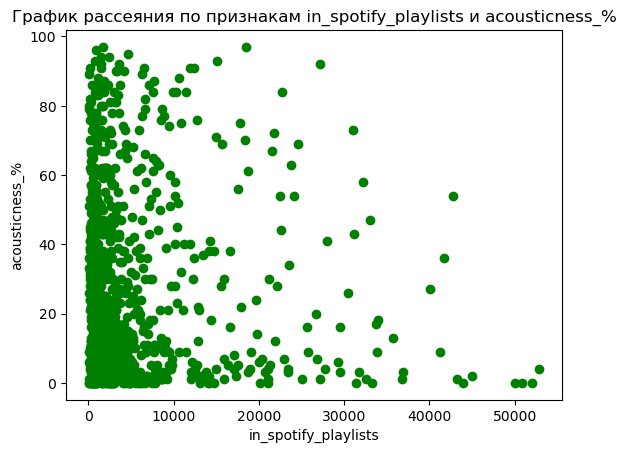

In [40]:
plt.scatter(x = df['in_spotify_playlists'], y = df['acousticness_%'], color = 'green')
plt.xlabel('in_spotify_playlists')
plt.ylabel('acousticness_%')
plt.title('График рассеяния по признакам in_spotify_playlists и acousticness_%')

Text(0.5, 1.0, 'График рассеяния по признакам danceability_% и streams')

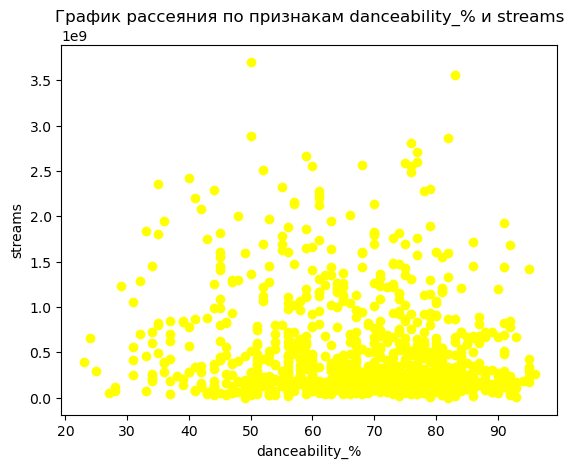

In [41]:
plt.scatter(x = df['danceability_%'], y = df['streams'], color = 'yellow')
plt.xlabel('danceability_%')
plt.ylabel('streams')
plt.title('График рассеяния по признакам danceability_% и streams')

Text(0.5, 1.0, 'График рассеяния по признакам energy_% и streams')

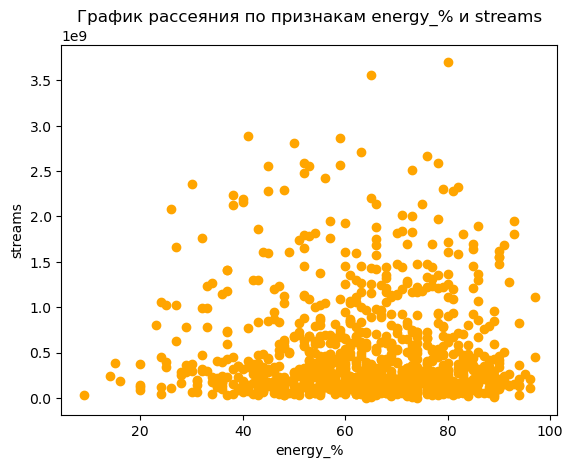

In [42]:
plt.scatter(x = df['energy_%'], y = df['streams'], color = 'orange')
plt.xlabel('energy_%')
plt.ylabel('streams')
plt.title('График рассеяния по признакам energy_% и streams')

Text(0.5, 1.0, 'График рассеяния по признакам acousticness_% и streams')

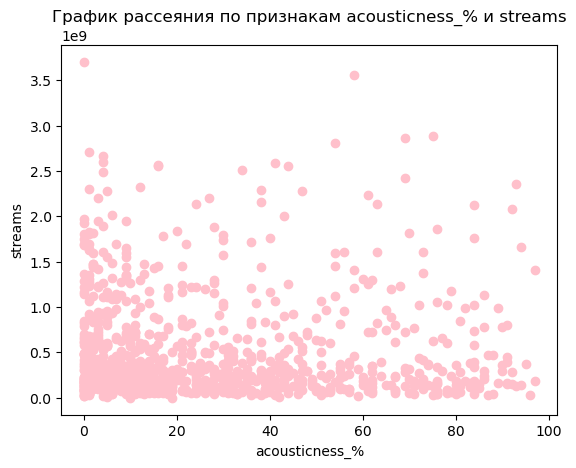

In [43]:
plt.scatter(x = df['acousticness_%'], y = df['streams'], color = 'pink')
plt.xlabel('acousticness_%')
plt.ylabel('streams')
plt.title('График рассеяния по признакам acousticness_% и streams')

Text(0.5, 1.0, 'График рассеяния по признакам danceability_% и energy_%')

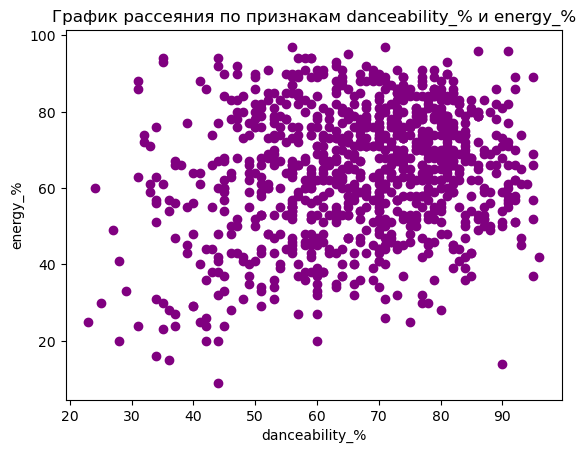

In [44]:
plt.scatter(x = df['danceability_%'], y = df['energy_%'], color = 'purple')
plt.xlabel('danceability_%')
plt.ylabel('energy_%')
plt.title('График рассеяния по признакам danceability_% и energy_%')

Text(0.5, 1.0, 'График рассеяния по признакам danceability_% и acousticness_%')

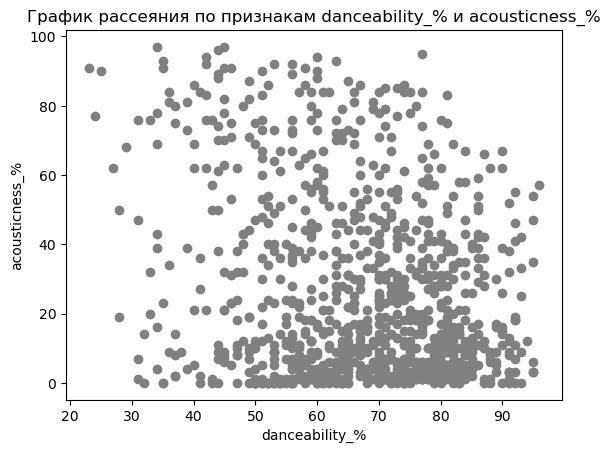

In [45]:
plt.scatter(x = df['danceability_%'], y = df['acousticness_%'], color = 'gray')
plt.xlabel('danceability_%')
plt.ylabel('acousticness_%')
plt.title('График рассеяния по признакам danceability_% и acousticness_%')

Text(0.5, 1.0, 'График рассеяния по признакам energy_% и acousticness_%')

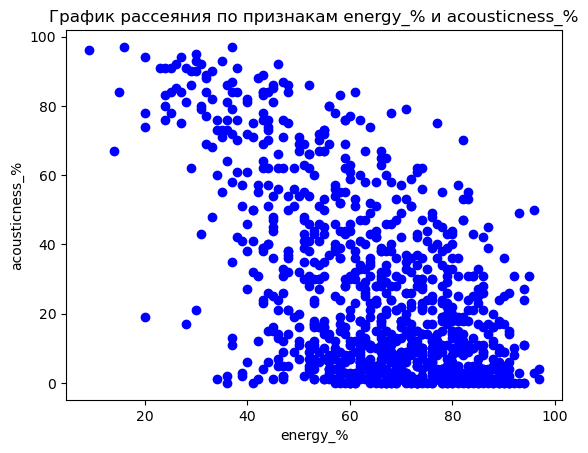

In [46]:
plt.scatter(x = df['energy_%'], y = df['acousticness_%'], color = 'blue')
plt.xlabel('energy_%')
plt.ylabel('acousticness_%')
plt.title('График рассеяния по признакам energy_% и acousticness_%')

# Регрессионный анализ

Мы выдвинули гипотезу, что чем в большем количестве плейлистов находится трек, тем больше прослушиваний он набирает. Для ее проверки мы построили линейную регрессию по соответствующим переменным in_apple_playlists и streams, а также проинтерпретировали полученную модель, применив такие метрики, как MSE, MAE, R-squared и визуализировав результаты.

MSE: 1.2958388174792466e+17
MAE: 244153683.61383504
R-squared: 0.596223259618072


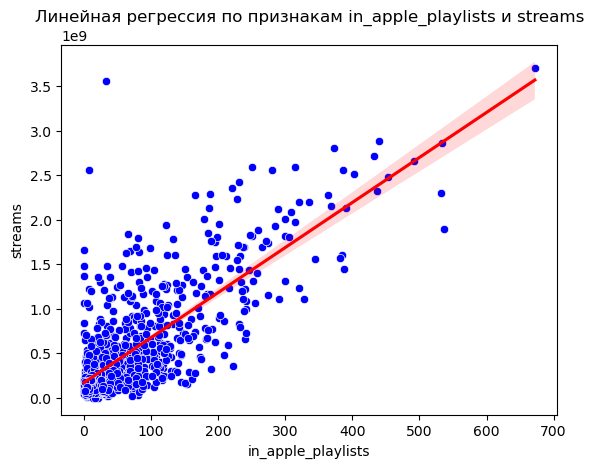

In [51]:
df['in_apple_playlists'] = df['in_apple_playlists'].fillna(df['in_apple_playlists'])
df['streams'] = df['streams'].fillna(df['streams'])
X = sm.add_constant(df['in_apple_playlists'])
Y = df['streams']
model = sm.OLS(Y, X).fit()
fig, ax = plt.subplots()
sns.scatterplot(x ='in_apple_playlists', y = 'streams', data = df, color = 'blue')
sns.regplot(x = 'in_apple_playlists', y = 'streams', data = df, color = 'red', scatter = False)
plt.title('Линейная регрессия по признакам in_apple_playlists и streams')
Y_pr = model.predict(X)
mse = np.mean(model.resid**2)
mae = np.mean(np.abs(model.resid))
rsquared = model.rsquared
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", rsquared)

Значение MSE (средней квадратичной ошибки), находится около 1.2958388174792466e+17, это значечение очень высоко. Следовательно, модель ошибается в прогнозах.

Значение MAE (средней абсолютной ошибки) близко к 244243427, то есть модель ошибается в прогнозах примерно на это значение.

Значение R-squared примерно 0.596, то есть модель объясняет примерно 59,6% дисперсии в данных и частично справляется с задачей, но остается также почти 40% необъясненных значений.

График визуально отображает прямую корреляцию между переменными, что может поспособствовать подтверждению нашей гипотезы.

In [48]:
model.params

const                 1.702593e+08
in_apple_playlists    5.063083e+06
dtype: float64

Математически, это можно интерпретировать так:
streams = 1.702593e+08 + 5.063083e+06 * in_apple_playlists


Поскольку коэффициент независимой переменной положительный, здесь наблюдается прямая линейная зависимость: добавление трека в 1 плейлист увеличивает его прослушиваемость на 5.063083e+06, при этом константа, то есть если число прослушиваний = 0, равна 1.702593e+08.

## Вывод
Положительный коэффициент предикторов (5.063083e+06) в математическом виде и визуальная интерпретация модели подтверждают нашу гипотезу. Однако вследствие того что модель ошибается (из-за больших значений MSE и MAE) и имеет качество чуть выше среднего (из-за значения R^2), мы не можем полностью опираться на нее при подтверждении гипотезы.